In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("../../data/ex2data1.txt", delimiter=",")

In [3]:
df = pd.DataFrame(data)
df.columns

RangeIndex(start=0, stop=3, step=1)

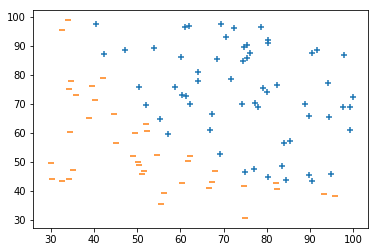

In [4]:
positive = df.loc[df[2] == 1]
nagetive = df.loc[df[2] == 0]
plt.scatter(positive[0], positive[1], marker="+")
plt.scatter(nagetive[0], nagetive[1], marker="_")
plt.show()

In [5]:
print df.iloc[:10, :2]
df.iloc[:10, 2]

           0          1
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376
5  45.083277  56.316372
6  61.106665  96.511426
7  75.024746  46.554014
8  76.098787  87.420570
9  84.432820  43.533393


0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: 2, dtype: float64

In [6]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable([[0.],[0.]])
b = tf.Variable([0.])
prob = tf.nn.sigmoid(tf.matmul(X,W)+b)
# prob = tf.matmul(X,W)+b

In [7]:
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print sess.run(prob, {X: data[:10, :2]/100})

[[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]


In [15]:
# cost = tf.reduce_sum((Y-1)*tf.log(1-prob)-Y*tf.log(prob))
# cost = tf.reduce_sum((Y-1)*tf.log(1.0-prob)-(Y*tf.log(prob)), reduction_indices=[0])
cost = tf.reduce_mean(tf.reduce_sum((-Y * tf.log(prob)) - ((1.0 - Y) * tf.log(1 - prob)), reduction_indices=[1]))

learning_rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [22]:
argMax = tf.argmin(prob, 1)
with tf.Session() as sess:
    sess.run(init)
    print sess.run(prob, {X: data[:, :2]/100, Y: data[:,2:]})

[[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]


In [12]:
tf.summary.scalar('cost', cost)
merged = tf.summary.merge_all() # this combines summary ops into 1 op so we can evaluate them together
log_folder_name="/notebooks/log/"

In [13]:
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print sess.run(W)
    print sess.run(cost, {X: data[:, :2]/100, Y: data[:,2:]})
    
    test_writer = tf.summary.FileWriter(log_folder_name, sess.graph)

    for i in range(10000):
        sess.run(optimizer, {X: data[:, :2]/100, Y: data[:,2:]})
#         print sess.run(cost, {X: df.iloc[:, :2], Y: df.iloc[:,2].reshape([100,1])})
        summary = sess.run(merged, feed_dict={X: data[:, :2]/100, Y: data[:,2:]})
        test_writer.add_summary(summary, i)
        
    [w_, b_] = sess.run([W, b])
    
    print sess.run(cost, {X: data[:, :2]/100, Y: data[:,2:]})

[[ 0.]
 [ 0.]]
0.693147
0.20928


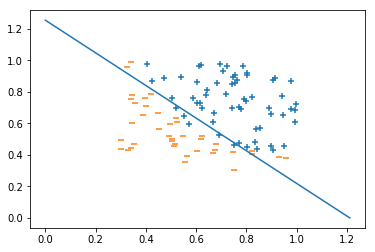

array([[ 16.13338089],
       [ 15.59278107]], dtype=float32)

In [14]:
plt.scatter(positive[0]/100, positive[1]/100, marker="+")
plt.scatter(nagetive[0]/100, nagetive[1]/100, marker="_")
plt.plot([(-b_/w_[0][0]), 0], [0, (-b_/w_[1][0])])
plt.show()
w_

In [36]:
df.iloc[:10,2:]

,2
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
5,0.0
6,1.0
7,1.0
8,1.0
9,1.0
